# Preprocessing

### 1.1] importing modules and reading Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
%matplotlib inline
pd.set_option('display.max_columns', None)

Reading Train Data

In [ ]:
data=pd.read_csv("/content/formatted_train_data.csv")

Reading Test Data

In [ ]:
data_test=pd.read_csv("/content/formatted_test_data.csv")

In [ ]:
data.head()

,Unnamed: 0,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Number of days
0,0,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal,14
1,1,Chad Byrd,61,Male,B-,NaN,2019-01-09,Paul Baker,Walton LLC,Medicare,0.000000,292,Emergency,2019-02-08,Lipitor,Normal,30
2,2,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal,1
3,3,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,NaN,Normal,24
4,4,Patrick Parker,41,Male,AB+,Arthritis,2020-08-20,Robin Green,Boyd PLC,Aetna,22522.363385,180,Urgent,2020-08-23,Aspirin,Abnormal,3


In [ ]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data_test.drop(['Unnamed: 0'],axis=1,inplace=True)

Drop First Column As it's Meaningless

### 1.2] Missing Values

Checking each column in our training data for null values and counting their occurrences, if any.

In [ ]:
data.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     9
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            8
Test Results          0
Number of days        0
dtype: int64

- We've identified that just two columns, specifically columns **```Medical Condition```** and **```Medication```**, contain a very small number of null values.

Before proceeding to handle them, let's determine the proportion they represent within our dataset.

In [ ]:
data.isnull().sum()/data.shape[0]*100

Name                  0.000000
Age                   0.000000
Gender                0.000000
Blood Type            0.000000
Medical Condition     0.148760
Date of Admission     0.000000
Doctor                0.000000
Hospital              0.000000
Insurance Provider    0.000000
Billing Amount        0.000000
Room Number           0.000000
Admission Type        0.000000
Discharge Date        0.000000
Medication            0.132231
Test Results          0.000000
Number of days        0.000000
dtype: float64

- The null values observed in the columns **`Medical Condition`** and **`Medication`** represent a very small percentage of our data, accounting for 0.14% and 0.13% respectively, indicating these are extremely minor portions.



Considering the critical nature of our domain, where accuracy is crucial and false identifications are undesirable, and given the minimal null percentages (0.14 % and 0.13 %) in the "Medical Condition" and "Medication" columns respectively, we will proceed with the removal of these null entries rather than employing any imputation method.

In [ ]:
data.dropna(axis=0,inplace=True)

Checking if null values still exists.

In [ ]:
data.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
Number of days        0
dtype: int64

- All null values within the dataset have been resolved and handled.

Applying the same approach used for the Test data, we'll inspect the testing data for the presence of null values,if any existed.

In [ ]:
data_test.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     6
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            6
Test Results          0
Number of days        0
dtype: int64

In [ ]:
data_test.isnull().sum()/data_test.shape[0]*100

Name                  0.000000
Age                   0.000000
Gender                0.000000
Blood Type            0.000000
Medical Condition     0.890208
Date of Admission     0.000000
Doctor                0.000000
Hospital              0.000000
Insurance Provider    0.000000
Billing Amount        0.000000
Room Number           0.000000
Admission Type        0.000000
Discharge Date        0.000000
Medication            0.890208
Test Results          0.000000
Number of days        0.000000
dtype: float64

Similar to the training data, we've noticed a minimal number of null values with slightly higher expected percentages in the test data. This discrepancy could be due to the smaller size of the test data compared to the training set. Nevertheless, we'll utilize the same approach to handle these null values given the critical nature of our domain.

In [ ]:
data_test.dropna(axis=0,inplace=True)

### 1.3] Duplicates

Verifying the training and testing datasets to identify any duplicated rows that might be present.

In [ ]:
data.duplicated().sum()

1

A single duplicated row has been detected in the training data. We will proceed with its removal.

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data_test.duplicated().sum()

0

- In the test data, no duplicate rows have been detected.


### 1.4] Outliers.

Examining the numerical columns for the presence of outliers.

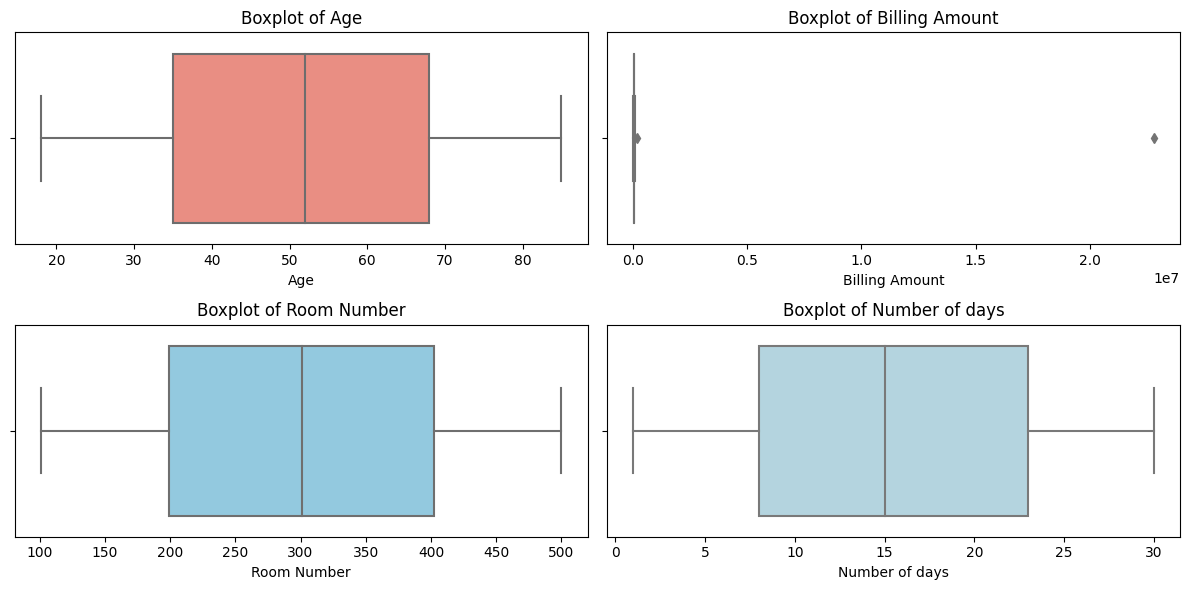

In [ ]:
numerical_columns = data.select_dtypes(exclude=['object', 'datetime64[ns]']).columns


num_cols = len(numerical_columns)
num_rows = (num_cols + 1) // 2

plt.figure(figsize=(12, 6))


custom_colors = ['skyblue', 'salmon', 'lightgreen', 'skyblue', 'lightblue']

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(x=data[col], color=custom_colors[i % len(custom_colors)])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

- We've identified that only the **```Billing Amount```** column contains outliers.

Let's compute the count and percentage of these outliers using the IQR method.

In [ ]:
def calculate_outliers(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [ ]:
lower_limit, upper_limit = calculate_outliers((data['Billing Amount']))

lower_outliers=len(data[(data['Billing Amount'])<lower_limit])
upper_outliers=len(data[(data['Billing Amount'])>upper_limit])

print(f"total outliers in col Billing Amount  = ",upper_outliers+lower_outliers," with precentage of ",(upper_outliers+lower_outliers)/data.shape[0]*100)

total outliers in col Billing Amount  =  2  with precentage of  0.03315100281783524


Before proceeding to handle these outliers by either removal or imputation, let's initially examine the distribution of these columns to ascertain if any transformation methods would be suitable.

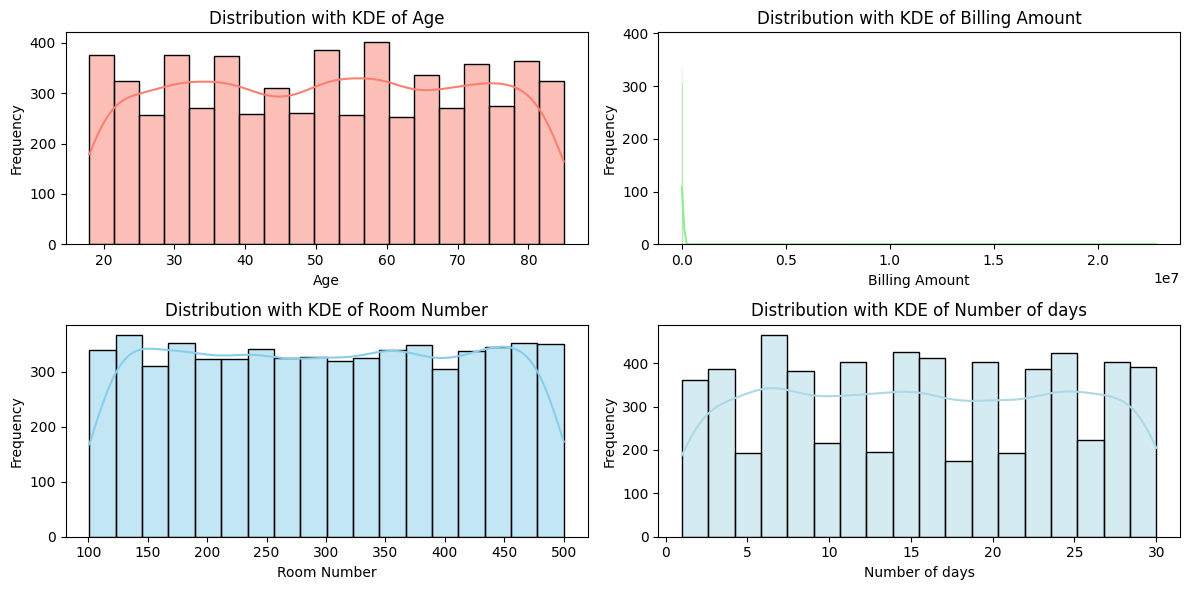

In [ ]:
numerical_columns = data.select_dtypes(exclude=['object', 'datetime64[ns]']).columns

num_cols = len(numerical_columns)
num_rows = (num_cols + 1) // 2

plt.figure(figsize=(12, 6))

custom_colors = ['skyblue', 'salmon', 'lightgreen', 'skyblue', 'lightblue']

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 2, i)
    sns.histplot(data[col], kde=True, color=custom_colors[i % len(custom_colors)])
    plt.title(f'Distribution with KDE of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

* The majority of columns appear to follow a normal distribution without requiring any transformation methods. However, the billing amount column stands out, displaying right skewness, confirming the presence of outliers within this column.


Eliminating the outliers found within the billing amount column.

In [ ]:
data = data[data['Billing Amount']<=upper_limit]


Validating the elimination of outliers by displaying the box plot for this column once more.

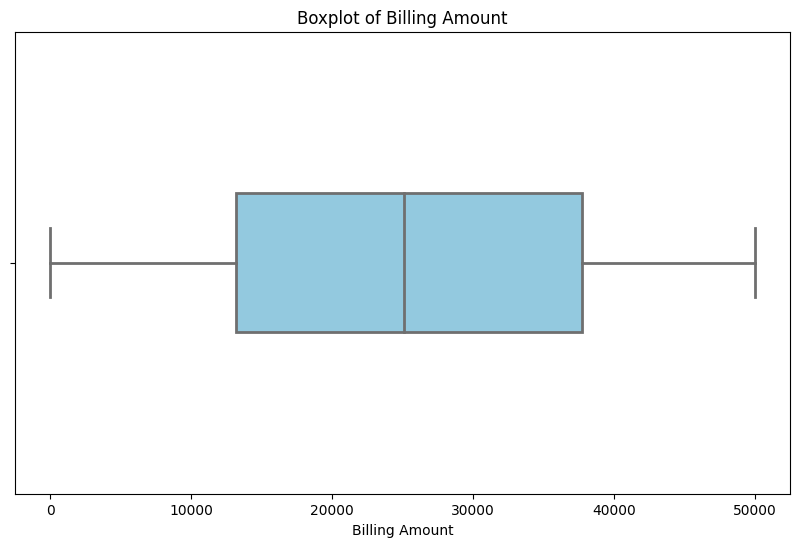

In [ ]:
plt.figure(figsize=(10, 6))

sns.boxplot(x=data['Billing Amount'], linewidth=2, width=0.3, color='skyblue', fliersize=3)
plt.title('Boxplot of Billing Amount')
plt.xlabel('Billing Amount')

plt.show()

The box plot analysis confirms the successful removal of the 2 outliers previously identified.


After removing the outliers, reassessing the distribution of this column to determine if further modifications are necessary.

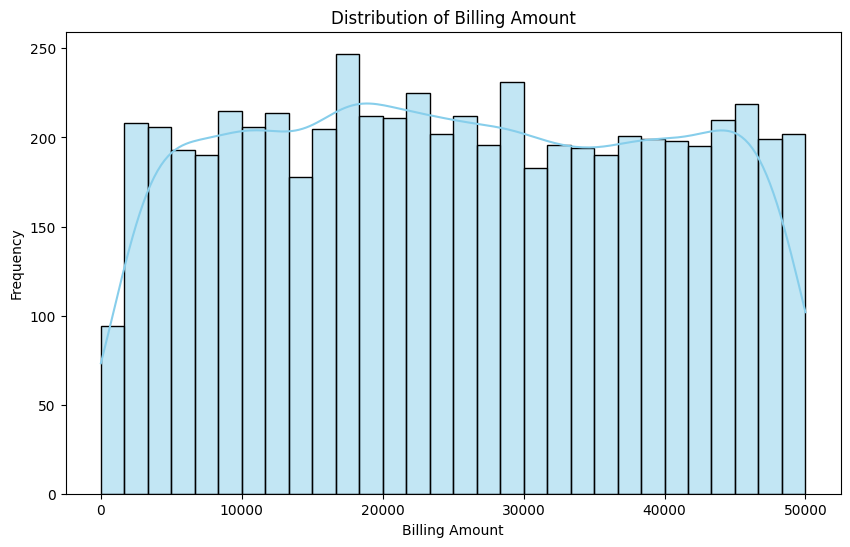

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Billing Amount'],kde=True, color='skyblue', bins=30)
plt.title('Distribution of Billing Amount')
plt.xlabel('Billing Amount')
plt.ylabel('Frequency')
plt.show()


* The **```Billing Amount```** column has achieved a normal distribution and no longer contains any outliers.


Leveraging **QQ-plots** to verify the adherence of our data to a normal distribution.

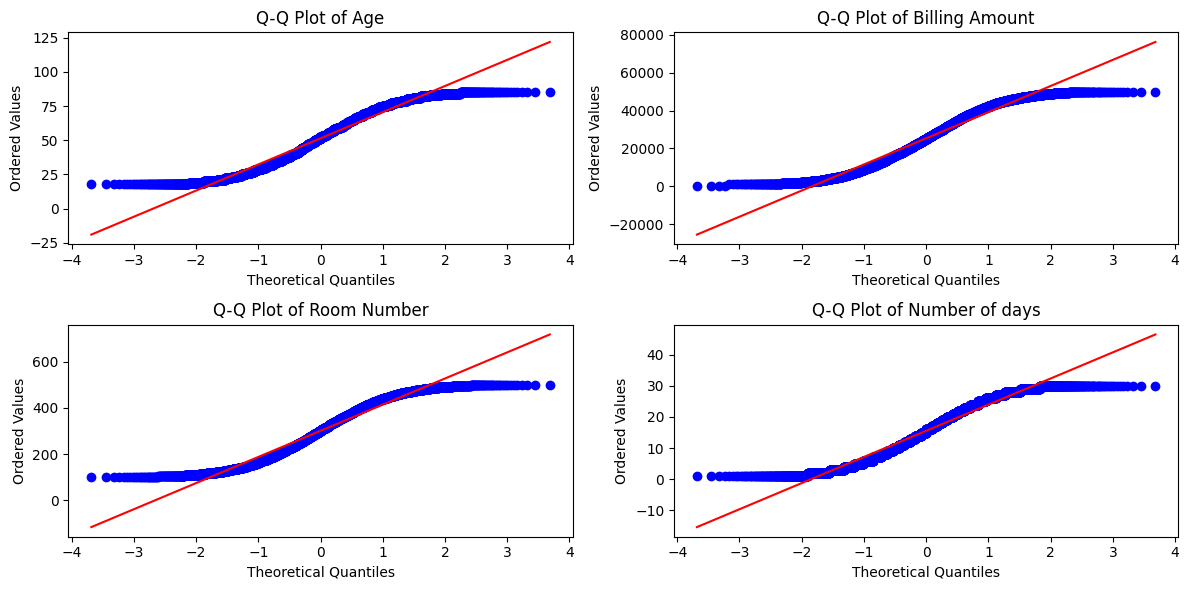

In [ ]:
numerical_columns = data.select_dtypes(exclude=['object', 'datetime64[ns]']).columns

num_cols = len(numerical_columns)
num_rows = (num_cols + 1) // 2

plt.figure(figsize=(12, 6))

custom_colors = ['skyblue', 'salmon', 'lightgreen', 'skyblue', 'lightblue']

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 2, i)
    stats.probplot(data[col], plot=sns.mpl.pyplot)
    plt.title(f'Q-Q Plot of {col}')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Ordered Values')

plt.tight_layout()
plt.show()


* All columns have been verified and assessed for normal distribution through various validation techniques.

### 1.5] Encoding.

Implementing diverse encoding techniques for efficient data transformation.

In [ ]:
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Number of days
0,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal,14
2,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal,1
4,Patrick Parker,41,Male,AB+,Arthritis,2020-08-20,Robin Green,Boyd PLC,Aetna,22522.363385,180,Urgent,2020-08-23,Aspirin,Abnormal,3
5,Charles Horton,82,Male,AB+,Hypertension,2021-03-22,Patricia Bishop,"Wheeler, Bryant and Johns",Cigna,39593.435761,161,Urgent,2021-04-15,Lipitor,Abnormal,24
6,Patty Norman,55,Female,O-,Arthritis,2019-05-16,Brian Kennedy,Brown Inc,Blue Cross,13546.817249,384,Elective,2019-06-02,Aspirin,Normal,17



Importing the Label Encoder module from Scikit-learn for encoding categorical data.

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

Applying Label Encoder to convert the categorical columns - **```Gender```**, **```Blood Type```**, **```Hospital```**, and **```Insurance Provider```** - into numerical representations.

* Due to the large number of distinct categories and the absence of inherent order in these columns, Label Encoding is deemed the most suitable method for encoding nominal data.

In [ ]:
data['Gender']=encoder.fit_transform(data['Gender'])
data['Blood Type']=encoder.fit_transform(data['Blood Type'])
data['Hospital']=encoder.fit_transform(data['Hospital'])
data['Insurance Provider']=encoder.fit_transform(data['Insurance Provider'])


One-hot encoding is great for **```'Medical Condition'```** and **```'Medication'```** columns because they're crucial for predictions and don't have many categories, making it the best way to represent them as features.

In [ ]:
data=pd.get_dummies(data,columns=["Medical Condition",'Medication'])


To convert the **```Admission Type```** column, we'll employ Ordinal Encoding or Ordinal Mapping due to the inherent order among its categories (urgent-elective-emergency).

In [ ]:
data['Admission Type']=np.where(data['Admission Type']=='Urgent',2,np.where(data['Admission Type']=='Emergency',1,0))


For our target feature **```Test Results```**, we'll apply **Binary Encoding**, where 'Normal' corresponds to 0 and 'Abnormal' to 1.

In [ ]:
data['Test Results']=np.where(data['Test Results']=='Normal',0,1)

In [ ]:
data.head()

,Name,Age,Gender,Blood Type,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Test Results,Number of days,Medical Condition_Arthritis,Medical Condition_Asthma,Medical Condition_Cancer,Medical Condition_Diabetes,Medical Condition_Hypertension,Medical Condition_Obesity,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
0,Ruben Burns,35,1,6,2023-06-01,Diane Jackson,619,4,47304.064845,404,1,2023-06-15,0,14,0,1,0,0,0,0,0,0,1,0,0
2,Antonio Frederick,49,1,5,2020-05-02,Brian Chandler,1569,3,23303.322092,480,2,2020-05-03,1,1,0,1,0,0,0,0,0,0,0,0,1
4,Patrick Parker,41,1,2,2020-08-20,Robin Green,452,0,22522.363385,180,2,2020-08-23,1,3,1,0,0,0,0,0,1,0,0,0,0
5,Charles Horton,82,1,2,2021-03-22,Patricia Bishop,5148,2,39593.435761,161,2,2021-04-15,1,24,0,0,0,0,1,0,0,0,1,0,0
6,Patty Norman,55,0,7,2019-05-16,Brian Kennedy,529,1,13546.817249,384,0,2019-06-02,0,17,1,0,0,0,0,0,1,0,0,0,0


In [ ]:
data_test.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Number of days
0,Bobby Keller,84,Male,AB-,Hypertension,2019-05-31,Mike Walker,Patterson-Johnson,Cigna,5402.833461,410,Elective,2019-06-09,Penicillin,Abnormal,9
1,Jesse Weaver,39,Female,AB+,Obesity,2019-04-19,Andrew Carter,Boyd LLC,Blue Cross,48779.537911,235,Elective,2019-05-18,Ibuprofen,Abnormal,29
4,Julie Hartman,84,Male,AB-,Cancer,2021-05-17,Daniel Mills,Wright-Spencer,Medicare,1739.106108,222,Urgent,2021-06-16,Lipitor,Normal,30
5,Chelsea Sanchez,80,Male,O+,Arthritis,2020-12-24,John Howard,"Bowen, Moore and Moody",Cigna,34865.241659,398,Emergency,2021-01-12,Paracetamol,Abnormal,19
6,Ann Davis,42,Male,O-,Cancer,2019-04-11,Rachel Taylor,"Wallace, Sims and Brown",UnitedHealthcare,23130.841424,245,Emergency,2019-04-14,Ibuprofen,Normal,3


Applying label encoding for the column 'Gender'

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data_test['Gender']=encoder.fit_transform(data_test['Gender'])

Applying label encoding for the column 'Blood Type'

In [ ]:
data_test['Blood Type']=encoder.fit_transform(data_test['Blood Type'])

Applying one hot encoding for the following columns (Medical Condition , Medication)

In [ ]:
data_test=pd.get_dummies(data_test,columns=["Medical Condition",'Medication'])

This encoding is considred ordinal encoding or label mapping for the column 'Admission Type'

In [ ]:
data_test['Admission Type']=np.where(data_test['Admission Type']=='Urgent',2,np.where(data_test['Admission Type']=='Emergency',1,0))

Applying Label Encoding for the columns 'Hospital' and 'Insurance Provider'

In [ ]:
data_test['Hospital']=encoder.fit_transform(data_test['Hospital'])
data_test['Insurance Provider']=encoder.fit_transform(data_test['Insurance Provider'])

Applying binary encoding for the column 'Test Results'

In [ ]:
data_test['Test Results']=np.where(data_test['Test Results']=='Normal',0,1)

### 1.6] Feature selection.


Analyzing the correlation between features to understand the relationships among the columns.

<ipython-input-152-5c80a0c09d81>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')


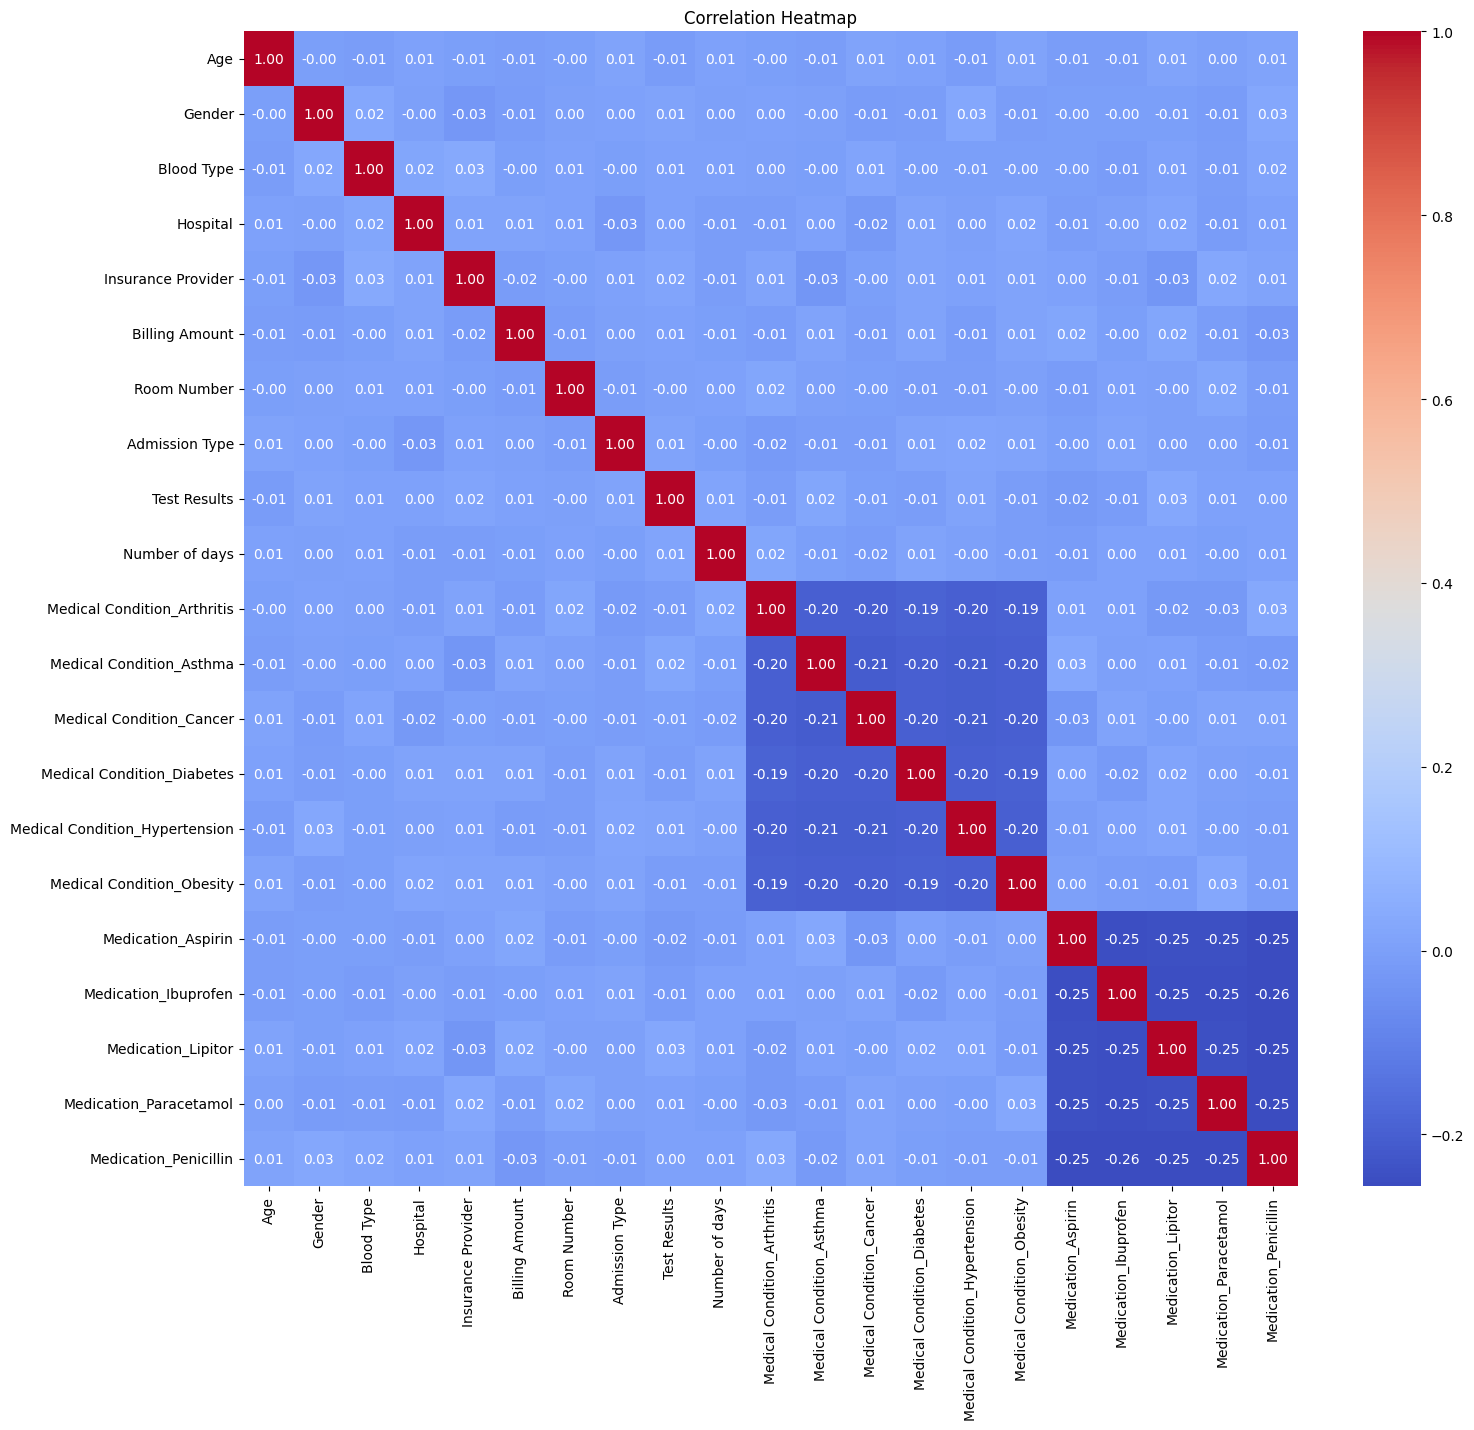

In [ ]:
plt.figure(figsize=(17,15 ))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


According to the Correlation Heatmap above:

* Most columns appear to lack significant correlations with each other.
* However, there are a few columns showing slightly higher correlation values together.

To further validate feature selection, we'll specifically analyze the correlation values of all columns with the target variable, **```Test Results.```**


Determining the corerelation between features and the target variable to evaluate their suitability for model inclusion.

<ipython-input-153-c4a6ae345c16>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data.corr()['Test Results'].drop('Test Results')


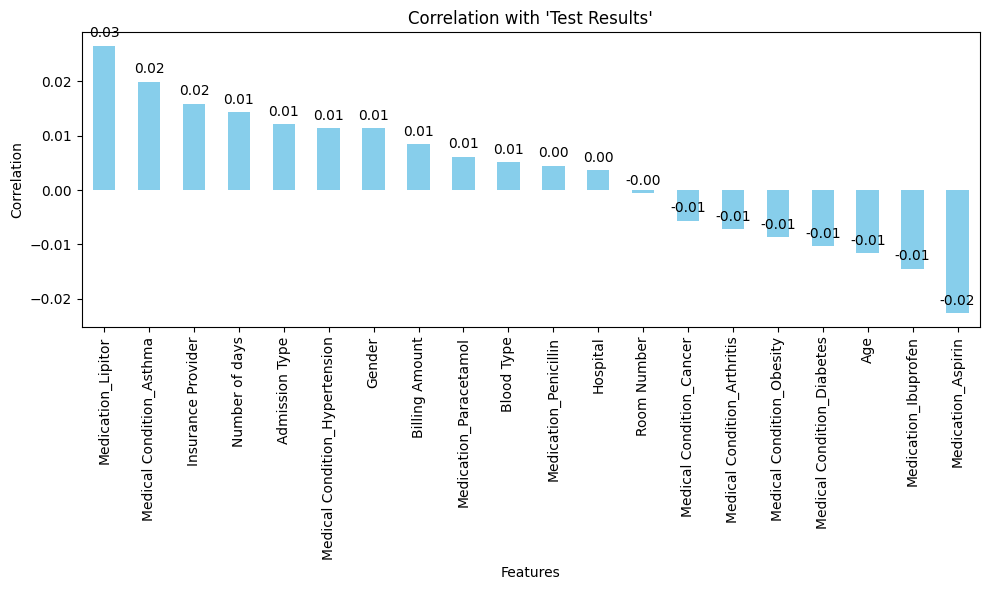

In [ ]:
correlations = data.corr()['Test Results'].drop('Test Results')
sorted_correlations = correlations.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = sorted_correlations.plot(kind='bar', color='skyblue')
plt.title("Correlation with 'Test Results'")
plt.xlabel('Features')
plt.ylabel('Correlation')

for i, v in enumerate(sorted_correlations):
    ax.text(i, v + 0.001, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Based on the plot :

* The majority of the original dataset features indicate no noticeable correlation with the target feature.
* Only a handful of columns resulting from the one-hot encoding process show slightly higher correlation values (around 0.2 to 0.3).
* Additionally, a few other columns from the one-hot encoding exhibit very weak negative correlation values.


These correlation values are too small to determine the most suitable features for inclusion in our model. To further confirm feature selection, we'll employ techniques such as **Mutual** **Information** and **Chi2** to select the best features for our model.


Splitting the training data into features and target variables and excluding irrelevant columns like patient and doctor names, as well as admission and discharge dates, which don't contribute to the model without feature selection.

In [ ]:
x = data.drop(['Test Results','Name','Date of Admission','Doctor','Discharge Date'],axis=1)
y = data['Test Results']

Importing the mutual info classifier from the sklearn library, applying it to the features and target, and plotting the mutual information values between features and the target on a graph for improved readability.

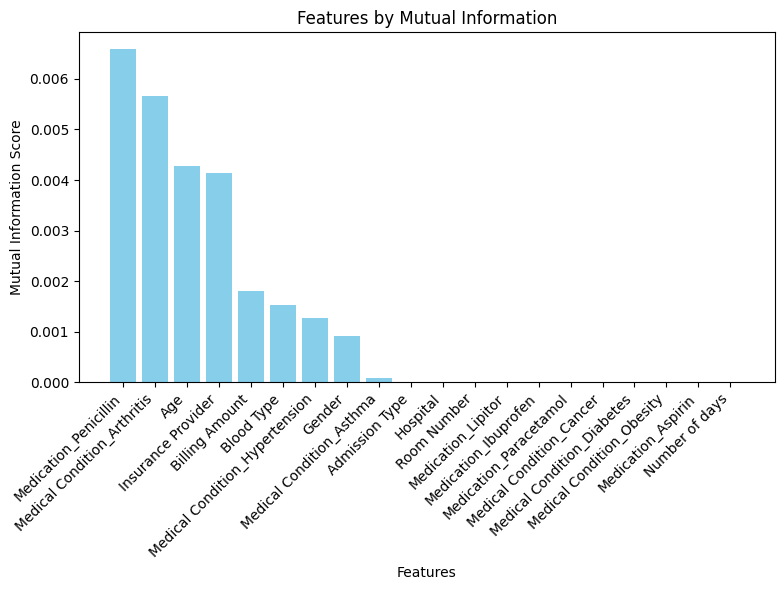

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mutual_info_scores = mutual_info_classif(x, y,random_state=1)

top_indices = np.argsort(mutual_info_scores)[::-1]


plt.figure(figsize=(8, 6))
plt.bar(x.columns[top_indices], mutual_info_scores[top_indices], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.title('Features by Mutual Information')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Observations from the Mutual Information Graph:

* Hospital, Room Number, and Number of days columns exhibit no mutual information with the target feature.
* Medication, Medical Condition, Age, and Insurance provider show the highest mutual information and are considered for inclusion in our model.
* Columns like Billing amount, Blood type, and Gender display lower mutual information values. Their inclusion in the model is undecided.


To confirm feature selection, we'll use the CHI2 method to calculate chi2 values with our target features. Then, we'll plot these values and prioritize features with higher chi2 values.

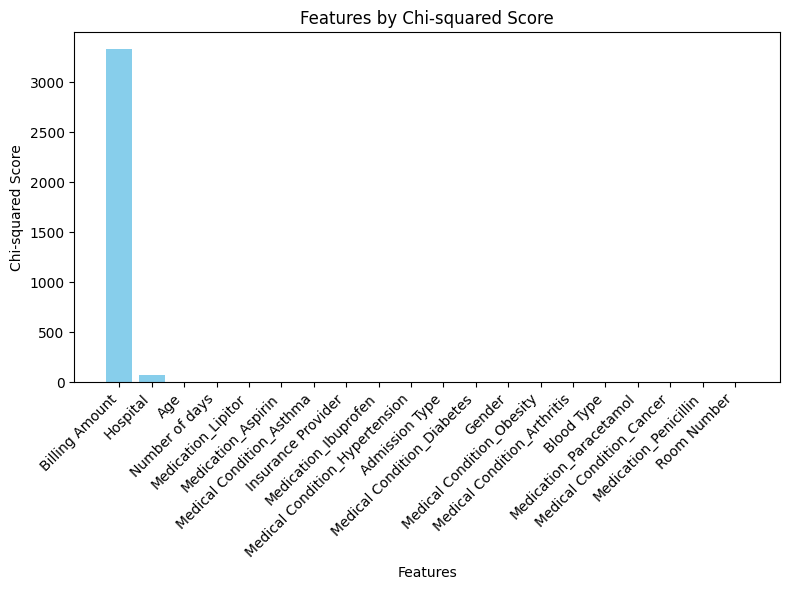

In [ ]:
from sklearn.feature_selection import chi2

chi2_scores, p_values = chi2(x, y)

top_indices = np.argsort(chi2_scores)[::-1]

# Visualize the features by their chi-squared scores
plt.figure(figsize=(8, 6))
plt.bar(x.columns[top_indices], chi2_scores[top_indices], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Chi-squared Score')
plt.title('Features by Chi-squared Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

From the CHI2 values:

* The Billing amount column exhibits the highest CHI2 value.
* Hosptial column shows a very small value for CHI2.
* None of the other columns demonstrate any CHI2 values with the target variable.

#### **Conclusion :**
After applying various Feature Selection Techniques and considering domain understanding, the selected features for model inclusion will be those with the highest mutual information values. Additionally, columns with lower mutual information values will also be included due to indecision regarding their relevance. However, despite observing a high CHI2 value for Billing amount, it won't be considered due to its unsuitability in the model based on domain understanding.

The Selected Features are :

* Age.
* Blood Type.
* Hosptial.
* Insurance Provider.
* Medical Condition
* Medication.

### 1.7] Scaling


Rescaling or normalizing our dataset plays a vital role in enhancing the performance of models by ensuring that all features contribute equally.


* We'll apply the Standardization method to scale our data.


Importing the **StandardScaler** module from sklearn and implementing it to standardize the chosen columns based on our previously performed feature selection. This process involves scaling the selected columns using standardization.

In [ ]:
from sklearn.preprocessing import StandardScaler
standrd_scaler=StandardScaler()
columns=['Room Number','Admission Type','Billing Amount','Number of Days',"Gender",'Doctor','Name','Date of Admission','Discharge Date','Test Results']
for col in data.columns:
  if col not in columns:
    data[col]=standrd_scaler.fit_transform(np.array(data[col]).reshape(-1,1))


In [ ]:
data.head()

,Name,Age,Gender,Blood Type,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Test Results,Number of days,Medical Condition_Arthritis,Medical Condition_Asthma,Medical Condition_Cancer,Medical Condition_Diabetes,Medical Condition_Hypertension,Medical Condition_Obesity,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
0,Ruben Burns,-0.839634,1,1.090645,2023-06-01,Diane Jackson,-1.336859,1.447532,47304.064845,404,1,2023-06-15,0,-0.182301,-0.438330,2.189399,-0.458336,-0.438061,-0.451434,-0.44021,-0.496578,-0.500725,2.018001,-0.494761,-0.512355
2,Antonio Frederick,-0.124035,1,0.655613,2020-05-02,Brian Chandler,-0.731117,0.736904,23303.322092,480,2,2020-05-03,1,-1.692545,-0.438330,2.189399,-0.458336,-0.438061,-0.451434,-0.44021,-0.496578,-0.500725,-0.495540,-0.494761,1.951771
4,Patrick Parker,-0.532949,1,-0.649482,2020-08-20,Robin Green,-1.443343,-1.394980,22522.363385,180,2,2020-08-23,1,-1.460199,2.281388,-0.456746,-0.458336,-0.438061,-0.451434,-0.44021,2.013783,-0.500725,-0.495540,-0.494761,-0.512355
5,Charles Horton,1.562733,1,-0.649482,2021-03-22,Patricia Bishop,1.550938,0.026276,39593.435761,161,2,2021-04-15,1,0.979425,-0.438330,-0.456746,-0.458336,-0.438061,2.215165,-0.44021,-0.496578,-0.500725,2.018001,-0.494761,-0.512355
6,Patty Norman,0.182650,0,1.525677,2019-05-16,Brian Kennedy,-1.394246,-0.684352,13546.817249,384,0,2019-06-02,0,0.166217,2.281388,-0.456746,-0.458336,-0.438061,-0.451434,-0.44021,2.013783,-0.500725,-0.495540,-0.494761,-0.512355


Additionally, scaling the testing data using the same approach applied to the training dataset.






In [ ]:
from sklearn.preprocessing import StandardScaler
standrd_scaler=StandardScaler()
columns=['Room Number','Admission Type','Billing Amount','Number of Days',"Gender",'Doctor','Name','Date of Admission','Discharge Date','Test Results']
for col in data_test.columns:
  if col not in columns:
    data_test[col]=standrd_scaler.fit_transform(np.array(data_test[col]).reshape(-1,1))


In [ ]:
data_test.head()

,Name,Age,Gender,Blood Type,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Test Results,Number of days,Medical Condition_Arthritis,Medical Condition_Asthma,Medical Condition_Cancer,Medical Condition_Diabetes,Medical Condition_Hypertension,Medical Condition_Obesity,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
0,Bobby Keller,1.548243,1,-0.277910,2019-05-31,Mike Walker,0.546951,-0.047392,5402.833461,410,0,2019-06-09,1,-0.812189,-0.470534,-0.439082,-0.404283,-0.443967,2.240130,-0.477703,-0.506129,-0.503774,-0.506129,-0.470534,1.948615
1,Jesse Weaver,-0.691240,0,-0.725541,2019-04-19,Andrew Carter,-1.504806,-0.744580,48779.537911,235,0,2019-05-18,1,1.541364,-0.470534,-0.439082,-0.404283,-0.443967,-0.446403,2.093350,-0.506129,1.985019,-0.506129,-0.470534,-0.513185
4,Julie Hartman,1.548243,1,-0.277910,2021-05-17,Daniel Mills,1.679692,0.649796,1739.106108,222,2,2021-06-16,0,1.659042,-0.470534,-0.439082,2.473516,-0.443967,-0.446403,-0.477703,-0.506129,-0.503774,1.975779,-0.470534,-0.513185
5,Chelsea Sanchez,1.349178,1,1.064983,2020-12-24,John Howard,-1.520835,-0.047392,34865.241659,398,1,2021-01-12,1,0.364587,2.125245,-0.439082,-0.404283,-0.443967,-0.446403,-0.477703,-0.506129,-0.503774,-0.506129,2.125245,-0.513185
6,Ann Davis,-0.541941,1,1.512614,2019-04-11,Rachel Taylor,1.455281,1.346984,23130.841424,245,1,2019-04-14,0,-1.518255,-0.470534,-0.439082,2.473516,-0.443967,-0.446403,-0.477703,-0.506129,1.985019,-0.506129,-0.470534,-0.513185


Generating the training dataset for the model by retaining only the columns selected through feature selection techniques, and discarding the remaining columns from the dataset.

Also creating the target feature data by selecting only the **```Test Results```** column

In [ ]:
x_train=data.drop(['Name','Date of Admission','Gender','Doctor','Billing Amount','Room Number','Discharge Date','Test Results','Number of days','Admission Type'],axis=1)
y_train=data[["Test Results"]]

In [ ]:
x_train.head()

,Age,Blood Type,Hospital,Insurance Provider,Medical Condition_Arthritis,Medical Condition_Asthma,Medical Condition_Cancer,Medical Condition_Diabetes,Medical Condition_Hypertension,Medical Condition_Obesity,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
0,-0.839634,1.090645,-1.336859,1.447532,-0.438330,2.189399,-0.458336,-0.438061,-0.451434,-0.44021,-0.496578,-0.500725,2.018001,-0.494761,-0.512355
2,-0.124035,0.655613,-0.731117,0.736904,-0.438330,2.189399,-0.458336,-0.438061,-0.451434,-0.44021,-0.496578,-0.500725,-0.495540,-0.494761,1.951771
4,-0.532949,-0.649482,-1.443343,-1.394980,2.281388,-0.456746,-0.458336,-0.438061,-0.451434,-0.44021,2.013783,-0.500725,-0.495540,-0.494761,-0.512355
5,1.562733,-0.649482,1.550938,0.026276,-0.438330,-0.456746,-0.458336,-0.438061,2.215165,-0.44021,-0.496578,-0.500725,2.018001,-0.494761,-0.512355
6,0.182650,1.525677,-1.394246,-0.684352,2.281388,-0.456746,-0.458336,-0.438061,-0.451434,-0.44021,2.013783,-0.500725,-0.495540,-0.494761,-0.512355



Implementing the same approach  used for the training data to generate the test dataset as testing features and test target.

In [ ]:
x_test=data_test.drop(['Name','Date of Admission','Gender','Doctor','Billing Amount','Room Number','Discharge Date','Test Results','Number of days','Admission Type'],axis=1)
y_test=data_test[["Test Results"]]

Save the modified data into new CSV files.

In [ ]:
x_train.to_csv("x_train.csv")
y_train.to_csv("y_train.csv")
x_test.to_csv("x_test.csv")
y_test.to_csv("y_test.csv")